<a href="https://colab.research.google.com/github/jdmartinezrs/chatbotDevelopmentPython/blob/main/evoluci%C3%B3nDelPrograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/gunthercox/ChatterBot.git@master
!pip install chatterbot_corpus

  Cloning https://github.com/gunthercox/ChatterBot.git (to revision master) to /tmp/pip-req-build-6hthoxce
  Running command git clone --filter=blob:none --quiet https://github.com/gunthercox/ChatterBot.git /tmp/pip-req-build-6hthoxce
  Resolved https://github.com/gunthercox/ChatterBot.git to commit 1b26cd4a24848b8f1caf06b9046dfc2dee3caf98
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


este es bueno

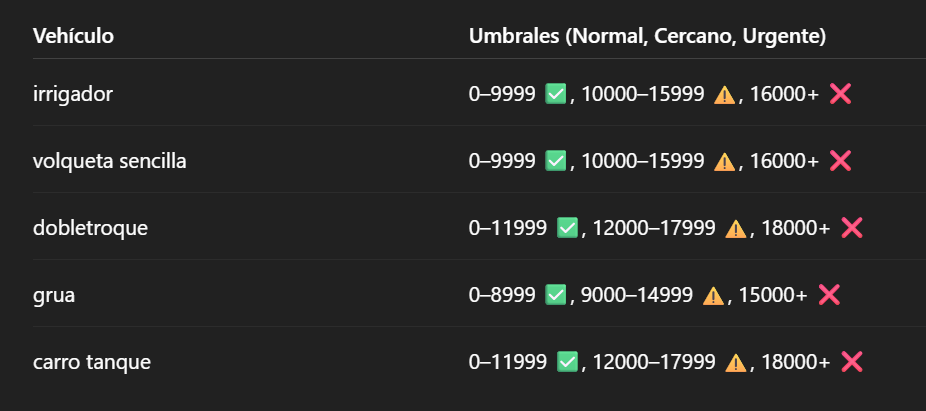

Muy buena pregunta. El valor de base en este contexto representa la vida útil estimada (en km) antes de que un vehículo deba recibir mantenimiento en condiciones ideales. Este valor depende del tipo de vehículo, su uso y el entorno en el que opera.

Aquí te doy una estimación general de valores adecuados de base para los tipos de vehículos que estás manejando:

Vehículo	Uso típico	Base sugerida (km)
Irrigador	Uso agrícola / riego	6,000 – 8,000
Volqueta sencilla	Carga liviana/moderada	7,000 – 9,000
Dobletroque	Carga pesada	6,000 – 7,500
Grúa	Trabajo intensivo puntual	5,500 – 6,500
Carro tanque	Transporte de líquidos	5,500 – 6,500

🔧 ¿Cómo decidir el valor exacto?
Uso intensivo (terrenos difíciles, sobrecarga): Usa un valor de base más bajo.

Mantenimiento constante y condiciones ideales: Puedes usar un valor más alto.

Historial de fallas: Si sabes que un vehículo suele presentar problemas a ciertos kilómetros, ajusta la base a ese punto.

coheficientes


📊 Valores típicos sugeridos:
Tipo de vehículo	Coeficiente sugerido	Justificación
Irrigador	0.10 – 0.15	Uso ligero o estacional
Volqueta sencilla	0.15 – 0.18	Transporte de carga ligera
Dobletroque	0.18 – 0.22	Carga pesada, mayor desgaste
Grúa	0.20 – 0.25	Uso intermitente pero exigente
Carro tanque	0.20 – 0.27	Carga líquida + uso especializado

backend aceptable backend aceptable

Tus valores para base, coeficiente y umbrales están mucho mejor ajustados para reflejar el desgaste y uso realista de cada tipo de vehículo. Aquí te dejo un resumen rápido de por qué funcionan bien:

Base: Más bajos en vehículos con mayor desgaste (grúa, dobletroque) y un poco más altos en vehículos que tienden a durar más entre mantenimientos (irrigador, carro tanque).

Coeficiente: Aumenta en vehículos con más desgaste por km, lo que hace que el "restante" disminuya más rápido según el uso, lo que es coherente.

Umbrales: Reflejan intervalos progresivos de mantenimiento para cada vehículo, basados en su uso y desgaste, ayudando a clasificar el mantenimiento de forma preventiva y urgente.

In [8]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

vehiculos = {
    "irrigador": {
        "base": 6000, "coeficiente": 0.13, "umbrales": (0, 10000, 16000)
    },
    "volqueta sencilla": {
        "base": 7000, "coeficiente": 0.16, "umbrales": (0, 8000, 14000)
    },
    "dobletroque": {
        "base": 6000, "coeficiente": 0.20, "umbrales": (0, 7000, 12000)
    },
    "grua": {
        "base": 5500, "coeficiente": 0.23, "umbrales": (0, 6000, 10000)
    },
    "carro tanque": {
        "base": 6500, "coeficiente": 0.25, "umbrales": (0, 9000, 15000)
    },
}

def clasificar_mantenimiento(tipo, km, datos):
    normal, cercano, urgente = datos.get("umbrales", (0, 10000, 16000))

    if km >= urgente:
        excedido = km - urgente
        return f"❌ {tipo.upper()} necesita mantenimiento urgente. Has pasado {excedido} km del límite."
    elif km >= cercano:
        return f"⚠️ {tipo.upper()} pronto requiere mantenimiento"
    else:
        return f"✅ {tipo.upper()} operando normalmente"

def km_restante_para_siguiente_umbral(km, umbrales):
    normal, cercano, urgente = umbrales
    if km < cercano:
        return cercano - km, "mantenimiento próximo"
    elif km < urgente:
        return urgente - km, "mantenimiento urgente"
    else:
        # Ya pasó el urgente, no queda restante
        return 0, "mantenimiento urgente"

# Crear y entrenar el chatbot
bot = ChatBot("MantenimientoBot")
trainer = ListTrainer(bot)
trainer.train([
    "Hola", "Hola, ¿qué vehículo deseas revisar?",
    'me gustaria revisar mi vehiculo',"¿qué vehículo tienes?",
    "me gustaria revisar otro vehiculo","¿qué deseas revisar?",
    "otro", '¿qué vehículo deseas revisar?',
    "Buenos días","Hola, ¿qué vehículo deseas revisar?",
    "Buenas tardes", "Hola, ¿qué vehículo deseas revisar?",
    "¿Qué sabes hacer?", "Puedo decirte cuándo darle mantenimiento a tu vehículo.",
    "¿Para qué sirves?", "Puedo decirte cuándo darle mantenimiento a tu vehículo.",
    'okey', "Hola, ¿qué vehículo deseas revisar?",
    "Chao", "¡Hasta luego! 🚚",
    "Adiós", "¡Hasta luego! 🚚"
])

# Flujo principal del chatbot
def ejecutar_chatbot():
    print("MantenimientoBot 🤖: ¡Hola! Soy tu asistente de mantenimiento de vehículos.")
    tipos = list(vehiculos.keys())

    while True:
        entrada = input("Tú: ").strip().lower()

        if entrada in ["salir", "chao", "adiós"]:
            print("MantenimientoBot 🤖: ¡Hasta luego! 🚚")
            break

        match = [tipo for tipo in tipos if tipo in entrada]
        if match:
            tipo = match[0]
            datos = vehiculos[tipo]

            try:
                km = int(input(f"MantenimientoBot 🤖: ¿Cuántos km ha recorrido el {tipo.upper()}? ").strip())
                if km < 0 or km > 25000:
                    print("MantenimientoBot 🤖: Por favor ingresa un valor entre 0 y 25000 km.")
                    continue

                restante, estado = km_restante_para_siguiente_umbral(km, datos["umbrales"])

                if restante > 0:
                    print(f"MantenimientoBot 🤖: Quedan {restante} km para el {estado}.")
                else:
                    print(f"MantenimientoBot 🤖: Ya ha pasado el límite para evitar un {estado}.")

                print(f"MantenimientoBot 🤖: {clasificar_mantenimiento(tipo, km, datos)}")

            except ValueError:
                print("MantenimientoBot 🤖: Por favor ingresa un número válido de km.")
        else:
            respuesta = bot.get_response(entrada)
            print("MantenimientoBot 🤖:", respuesta)

# Ejecutar el chatbot
ejecutar_chatbot()


List Trainer: 22it [00:00, 909.94it/s]


MantenimientoBot 🤖: ¡Hola! Soy tu asistente de mantenimiento de vehículos.
Tú: quiero revisar mi vehiculo
MantenimientoBot 🤖: ¿qué vehículo tienes?
Tú: dobletroque
MantenimientoBot 🤖: ¿Cuántos km ha recorrido el DOBLETROQUE? 8000
MantenimientoBot 🤖: Quedan 4000 km para el mantenimiento urgente.
MantenimientoBot 🤖: ⚠️ DOBLETROQUE pronto requiere mantenimiento
Tú: otro
MantenimientoBot 🤖: ¿qué vehículo deseas revisar?
Tú: dobletroque
MantenimientoBot 🤖: ¿Cuántos km ha recorrido el DOBLETROQUE? 13000
MantenimientoBot 🤖: Ya ha pasado el límite para mantenimiento urgente.
MantenimientoBot 🤖: ❌ DOBLETROQUE necesita mantenimiento urgente. Has pasado 1000 km del límite.
Tú: adios
MantenimientoBot 🤖: me gustaria revisar mi vehiculo
Tú: otro
MantenimientoBot 🤖: ¿qué vehículo deseas revisar?
Tú: grua
MantenimientoBot 🤖: ¿Cuántos km ha recorrido el GRUA? 15000
MantenimientoBot 🤖: Ya ha pasado el límite para mantenimiento urgente.
MantenimientoBot 🤖: ❌ GRUA necesita mantenimiento urgente. Has pasad

KeyboardInterrupt: Interrupted by user

In [ ]:
normal, cercano, urgente = umbrales_fijos.get(tipo, (0, 10000, 16000))

umbrales_fijos = {
    "irrigador": (0, 10000, 16000),
    "volqueta sencilla": (0, 10000, 16000),
    "dobletroque": (0, 12000, 18000),
    "grua": (0, 9000, 15000),
    "carro tanque": (0, 12000, 18000),
}

In [ ]:
vehiculos = {
    "irrigador": {"base": 7000, "coeficiente": 0.15},
    "volqueta sencilla": {"base": 7500, "coeficiente": 0.17},
    "dobletroque": {"base": 6900, "coeficiente": 0.21},
    "grua": {"base": 6100, "coeficiente": 0.22},
    "carro tanque": {"base": 5800, "coeficiente": 0.25},
}

frontend

In [2]:
pip install gradio chatterbot rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer
import gradio as gr

# Base de datos de vehículos
vehiculos = {
    "irrigador": {"base": 7000, "coeficiente": 0.15},
    "volqueta sencilla": {"base": 7500, "coeficiente": 0.17},
    "dobletroque": {"base": 6900, "coeficiente": 0.21},
    "grua": {"base": 6100, "coeficiente": 0.22},
    "carro tanque": {"base": 5800, "coeficiente": 0.25},
}

# Umbrales de mantenimiento por defecto
umbrales_fijos = {
    "irrigador": (0, 10000, 16000),
    "volqueta sencilla": (0, 10000, 16000),
    "dobletroque": (0, 10000, 16000),
    "grua": (0, 10000, 16000),
    "carro tanque": (0, 10000, 16000),
}

# Clasificación de estado de mantenimiento
def clasificar_mantenimiento(tipo, km):
    normal, cercano, urgente = umbrales_fijos.get(tipo, (0, 10000, 16000))
    if km >= urgente:
        return f"❌ {tipo.upper()} necesita mantenimiento urgente"
    elif km >= cercano:
        return f"⚠️ {tipo.upper()} pronto requiere mantenimiento"
    else:
        return f"✅ {tipo.upper()} operando normalmente"

# Crear y entrenar el chatbot
bot = ChatBot("MantenimientoBot")
trainer = ListTrainer(bot)
trainer.train([
    "Hola", "Hola, ¿qué vehículo deseas revisar?",
    "Hola", "Hola, ¿qué vehículo deseas revisar?",
    'me gustaria revisar mi vehiculo',"¿qué vehículo tienes?",
    "me gustaria revisar otro vehiculo","¿qué deseas revisar?",
    "otro", '¿qué vehículo deseas revisar?',
    "Buenos días","Hola, ¿qué vehículo deseas revisar?",
    "Buenas tardes", "Hola, ¿qué vehículo deseas revisar?",
    "¿Qué sabes hacer?", "Puedo decirte cuándo darle mantenimiento a tu vehículo.",
    "¿Para qué sirves?", "Puedo decirte cuándo darle mantenimiento a tu vehículo.",
    'okey', "Hola, ¿qué vehículo deseas revisar?",
    "Chao", "¡Hasta luego! 🚚",
    "Adiós", "¡Hasta luego! 🚚"
])

# Chatbot principal para Gradio
contexto = {"vehiculo": None}

def chatbot_gradio(mensaje_usuario):
    mensaje_usuario = mensaje_usuario.lower()

    # Salida si desea salir
    if mensaje_usuario in ["salir", "chao", "adiós"]:
        return "¡Hasta luego! 🚚"

    tipos = list(vehiculos.keys())
    match = [tipo for tipo in tipos if tipo in mensaje_usuario]

    if match:
        contexto["vehiculo"] = match[0]
        return f"¿Cuántos km ha recorrido el {contexto['vehiculo'].upper()}?"

    if contexto["vehiculo"]:
        try:
            km = int(mensaje_usuario)
            if km < 0 or km > 25000:
                return "Por favor ingresa un valor entre 0 y 25000 km."

            datos = vehiculos[contexto["vehiculo"]]
            base = datos["base"]
            coef = datos["coeficiente"]
            restante = max(0, round(base - km * coef))

            estado = clasificar_mantenimiento(contexto["vehiculo"], km)
            vehiculo_actual = contexto["vehiculo"]
            contexto["vehiculo"] = None  # Reiniciar contexto
            return f"Le quedan {restante} km antes del mantenimiento.\n{estado}"
        except ValueError:
            return "Por favor ingresa un número válido de km."

    # Conversación general
    respuesta = bot.get_response(mensaje_usuario)
    return str(respuesta)

# Crear interfaz Gradio
iface = gr.Interface(
    fn=chatbot_gradio,
    inputs=gr.Textbox(placeholder="Escribe algo..."),
    outputs="text",
    title="MantenimientoBot 🤖",
    description="Asistente para saber cuándo realizar el mantenimiento de tu vehículo."
)

iface.launch()


List Trainer: 24it [00:00, 497.08it/s]


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2c207844ecfc1f3718.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


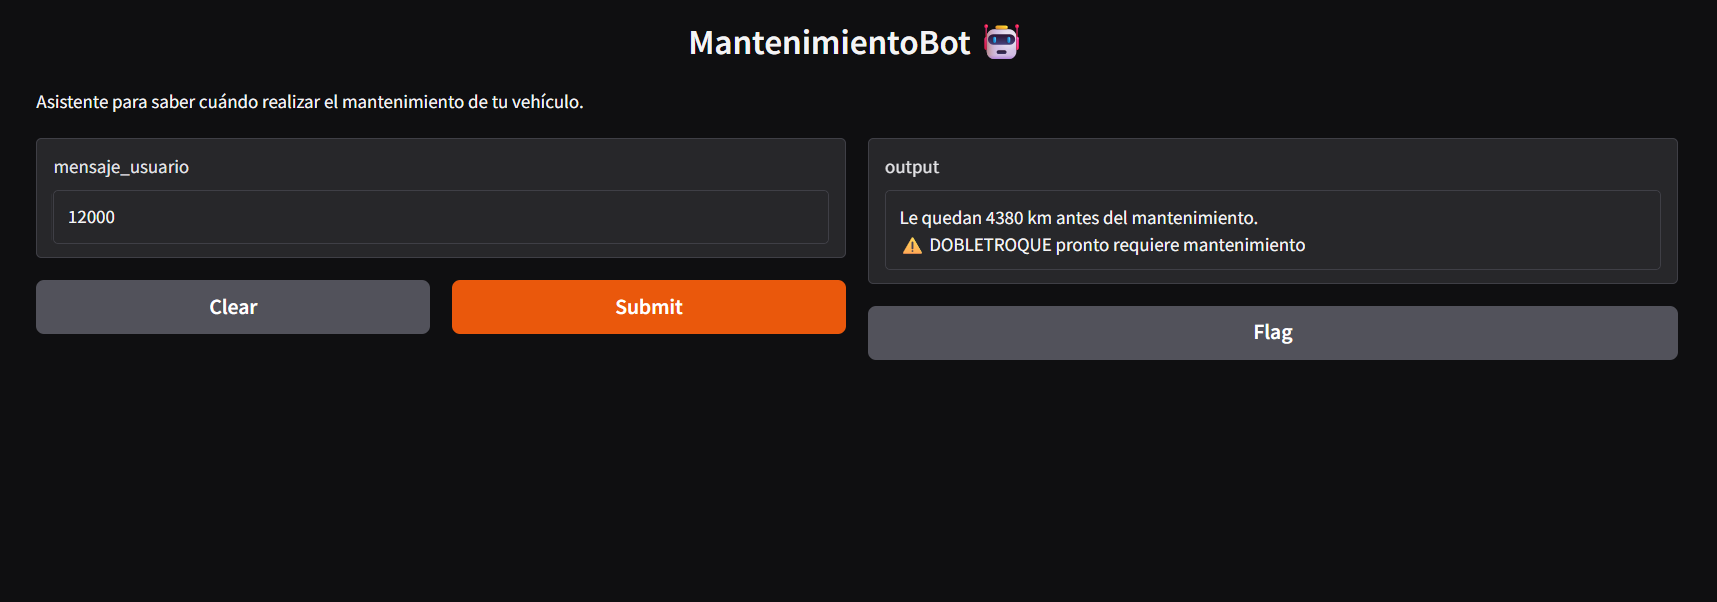